# P3 Continuous Control Solution

In [1]:
from collections import deque
from unityagents import UnityEnvironment

## Open environment and view the space

In [2]:

env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


## Run while training agent

In [3]:
import torch
import numpy as np
from time import time
def run(n_episodes=3000, save_every=100, print_every = 10, steps_to_learn=15, update_learn=20):
    scores_moving_win = deque(maxlen=100)
    total_scores = []
    for i_episode in range(1, n_episodes+1):
        t0 = time()
        scores = np.zeros(num_agents)                         # One score per agent
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        agent.reset()
        t = 0
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]      
            next_states = env_info.vector_observations            
            rewards = env_info.rewards
            scores += rewards
            dones = env_info.local_done 
            for i in range(len(states)):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            states = next_states
            if t%steps_to_learn == 0:
                for _ in range(update_learn):
                    agent.learn()
            if np.all(dones):                                  # exit loop if all episodes finished
                break
            t += 1

        max_score = np.max(scores)                             # keep the larger of the two scores
        scores_moving_win.append(max_score)
        total_scores.append(max_score)
        average_score_moving_win = np.mean(scores_moving_win)
        t1 = time()
        print('\rEpisode {}\tAverage Score Moving Win: {:.2f} \t Score this episode: {:.2f} \t episode-time {:.3f} sec'.format(
            i_episode, average_score_moving_win, max_score, t1-t0), end="")

        if i_episode % print_every == 0:
            print()

        if i_episode % save_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_{}_actor.pth'.format(i_episode))
            torch.save(agent.critic_local.state_dict(), 'checkpoint_{}_critic.pth'.format(i_episode) )
        
        if (average_score_moving_win >= 0.5) and (len(scores_moving_win) == 100):
            print("\nReached train condition by episode {}!".format(i_episode))
            torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'final_critic.pth')
            break
    return total_scores

In [4]:
#Run Training
#Instantiate critic and actor 
from agent import Agent

agent = Agent(state_size=state_size, action_size=action_size)
scores = run()

cuda:0
Episode 10	Average Score Moving Win: 0.01 	 Score this episode: 0.09 	 episode-time 0.045 sec
Episode 20	Average Score Moving Win: 0.00 	 Score this episode: 0.00 	 episode-time 0.023 sec
Episode 30	Average Score Moving Win: 0.00 	 Score this episode: 0.00 	 episode-time 0.020 sec
Episode 40	Average Score Moving Win: 0.01 	 Score this episode: 0.00 	 episode-time 0.175 sec
Episode 50	Average Score Moving Win: 0.01 	 Score this episode: 0.00 	 episode-time 0.180 sec
Episode 60	Average Score Moving Win: 0.00 	 Score this episode: 0.00 	 episode-time 0.174 sec
Episode 70	Average Score Moving Win: 0.00 	 Score this episode: 0.00 	 episode-time 0.177 sec
Episode 80	Average Score Moving Win: 0.00 	 Score this episode: 0.10 	 episode-time 0.356 sec
Episode 90	Average Score Moving Win: 0.01 	 Score this episode: 0.00 	 episode-time 0.175 sec
Episode 100	Average Score Moving Win: 0.01 	 Score this episode: 0.00 	 episode-time 0.182 sec
Episode 110	Average Score Moving Win: 0.01 	 Score t

Episode 870	Average Score Moving Win: 0.17 	 Score this episode: 0.20 	 episode-time 1.249 sec
Episode 880	Average Score Moving Win: 0.18 	 Score this episode: 0.10 	 episode-time 0.842 sec
Episode 890	Average Score Moving Win: 0.16 	 Score this episode: 0.10 	 episode-time 0.834 sec
Episode 900	Average Score Moving Win: 0.16 	 Score this episode: 0.10 	 episode-time 1.030 sec
Episode 910	Average Score Moving Win: 0.16 	 Score this episode: 0.70 	 episode-time 3.986 sec
Episode 920	Average Score Moving Win: 0.17 	 Score this episode: 0.10 	 episode-time 0.423 sec
Episode 930	Average Score Moving Win: 0.17 	 Score this episode: 0.10 	 episode-time 0.833 sec
Episode 940	Average Score Moving Win: 0.16 	 Score this episode: 0.09 	 episode-time 0.434 sec
Episode 950	Average Score Moving Win: 0.17 	 Score this episode: 0.10 	 episode-time 1.278 sec
Episode 960	Average Score Moving Win: 0.17 	 Score this episode: 0.10 	 episode-time 1.093 sec
Episode 970	Average Score Moving Win: 0.16 	 Score

In [5]:
torch.save(agent.actor_local.state_dict(), 'final_actor.pth')
torch.save(agent.critic_local.state_dict(), 'final_critic.pth')

## Plot run results

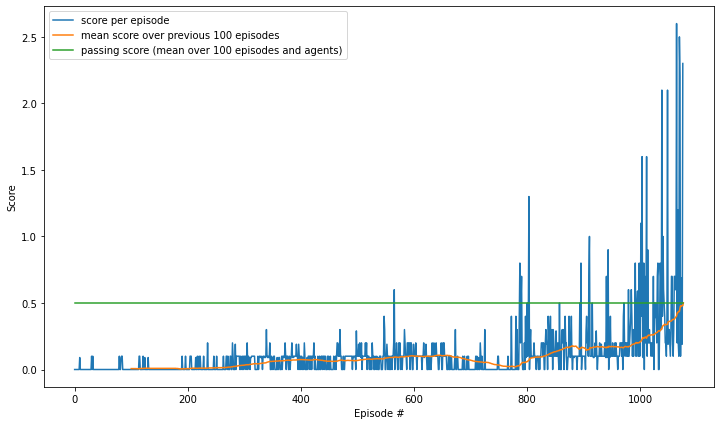

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
N_smooth = 100
smoothed_scores = np.convolve(scores, np.ones(N_smooth)/N_smooth, 'valid')
plt.plot(N_smooth + np.arange(len(smoothed_scores)), smoothed_scores)
plt.plot([0,len(scores)],[0.5, 0.5])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(['score per episode',
            'mean score over previous 100 episodes',
            'passing score (mean over 100 episodes and agents)'])
plt.show()

In [10]:
env.close()